In [1]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import time
from pylab import rcParams
import seaborn as sns
sns.set(style='whitegrid',palette='pastel')
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

# Read in Data

In [2]:
pediatrics_pct=pd.read_csv('pediatrics_residency_pct.csv')
familymedicine_pct=pd.read_csv('familymedicine_residency_pct.csv')
surgerygen_pct=pd.read_csv('surgery-gen_residency_pct.csv')
psychiatry_pct=pd.read_csv('psychiatry_residency_pct.csv')
urology_pct=pd.read_csv('urology_residency_pct.csv')
orthopaedic_pct=pd.read_csv('orthpaedic_residency_pct.csv')


In [3]:
graduates=pd.read_csv('grads_cleaned.csv')

In [4]:
graduates.columns

Index(['year', 'White_grads', 'Black_grads', 'Asian_grads', 'Hispanic_grads',
       'American Indian/ Alaska Native_grads',
       'Native Hawaiian/ Pacific Islander_grads', 'Other_grads',
       'Multiple Race/ Ethnicity_grads',
       'Non-U.S. Citizen/Non-Permanent Resident_grads',
       'Unknown Race/ Ethnicity_grads', 'Total_grads', 'White_pct_grads',
       'Black_pct_grads', 'Asian_pct_grads', 'Hispanic_pct_grads',
       'American Indian/ Alaska Native_pct_grads',
       'Native Hawaiian/ Pacific Islander_pct_grads', 'Other_pct_grads',
       'Multiple Race/ Ethnicity_pct_grads',
       'Non-U.S. Citizen/Non-Permanent Resident_pct_grads',
       'Unknown Race/ Ethnicity_pct_grads'],
      dtype='object')

In [5]:
drop_cols = [col for col in graduates.columns if 'pct' in col]
graduates_num=graduates.drop(columns=drop_cols)
drop_cols.append('year')

In [6]:
graduates_pct=graduates[drop_cols]

In [7]:
graduates_pct

,White_pct_grads,Black_pct_grads,Asian_pct_grads,Hispanic_pct_grads,American Indian/ Alaska Native_pct_grads,Native Hawaiian/ Pacific Islander_pct_grads,Other_pct_grads,Multiple Race/ Ethnicity_pct_grads,Non-U.S. Citizen/Non-Permanent Resident_pct_grads,Unknown Race/ Ethnicity_pct_grads,year
0,57.849320,5.819228,20.472397,5.133311,0.149353,0.022126,1.659476,6.460892,2.019029,0.414869,2014
1,58.765036,5.672280,19.786153,4.565624,0.106923,0.026731,1.630580,7.089014,1.897888,0.459770,2015
2,57.149646,5.470483,21.084592,5.016369,0.163692,0.036963,1.415144,7.186609,1.869258,0.607245,2016
3,58.765036,5.672280,19.786153,4.565624,0.106923,0.026731,1.630580,7.089014,1.897888,0.459770,2017
4,55.791950,5.722907,20.973764,5.416049,0.107400,0.046029,1.820692,7.702143,1.421777,0.997289,2018


#  Add in Columns for Specialty

In [8]:
psychiatry_pct['specialty']='psychiatry'
surgerygen_pct['specialty']='surgerygen'
pediatrics_pct['specialty']='pediatrics'
familymedicine_pct['specialty']='familymedicine'
urology_pct['specialty']='urology'
orthopaedic_pct['specialty']='orthopaedic'

In [9]:
graduates_pct['specialty']='total_grads'

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
graduates_pct=graduates_pct.rename(columns={'White_pct_grads':'White','Black_pct_grads':'Black/African American','Hispanic_pct_grads':'Hispanic_ Latino_/of Spanish Origin','American Indian/ Alaska Native_pct_grads':'American Indian/Alaska Native','Other_pct_grads':'Other Race/Ethnicity','Unknown Race/ Ethnicity_pct_grads':'Unknown Race/Ethnicity','Native Hawaiian/ Pacific Islander_pct_grads':'Native Hawaiian/Other Pacific Islander','Asian_pct_grads':'Asian'})
                                            
                                            


In [11]:
multi_race_pct=graduates_pct[['Non-U.S. Citizen/Non-Permanent Resident_pct_grads','Multiple Race/ Ethnicity_pct_grads','year']]

In [12]:
gradutes_pct=graduates_pct.drop(columns=['Non-U.S. Citizen/Non-Permanent Resident_pct_grads','Multiple Race/ Ethnicity_pct_grads'])

# Make Dataframes by Race

In [13]:
df=pediatrics_pct.append(graduates_pct)

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [14]:
df=df.append([surgerygen_pct,familymedicine_pct,psychiatry_pct,urology_pct,orthopaedic_pct])

In [15]:
df=df.drop(columns=['Non-U.S. Citizen/Non-Permanent Resident_pct_grads','Multiple Race/ Ethnicity_pct_grads'])

In [16]:
df.columns

Index(['American Indian/Alaska Native', 'Asian', 'Black/African American',
       'Hispanic_ Latino_/of Spanish Origin',
       'Native Hawaiian/Other Pacific Islander', 'Other Race/Ethnicity',
       'Unknown Race/Ethnicity', 'White', 'specialty', 'year'],
      dtype='object')

In [17]:
white =df[['White','specialty','year']]
native_american =df[['American Indian/Alaska Native','specialty','year']]
asian =df[['Asian','specialty','year']]
black =df[['Black/African American','specialty','year']]
hispanic=df[['Hispanic_ Latino_/of Spanish Origin','specialty','year']]
hawaiian=df[['Native Hawaiian/Other Pacific Islander','specialty','year']]
other =df[['Other Race/Ethnicity','specialty','year']]
unknown =df[['Unknown Race/Ethnicity','specialty','year']]

Text(0.5, 1.0, 'Percentage of White Residency Applications by Specialty')

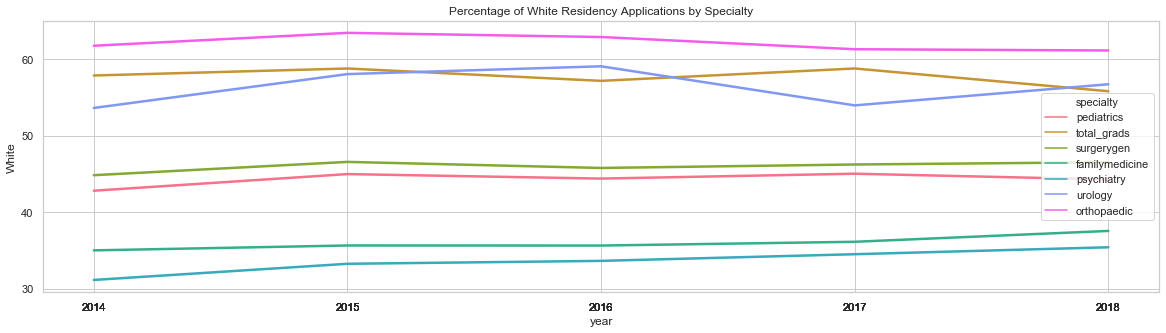

In [18]:
rcParams['figure.figsize'] = 20, 5
plt.figure()
plt.xticks(white['year'].values)
plt.yticks(range(0,70,10))
sns.lineplot(data=white,x='year',y='White',hue='specialty', palette="husl", linewidth=2.5)
plt.title('Percentage of White Residency Applications by Specialty')

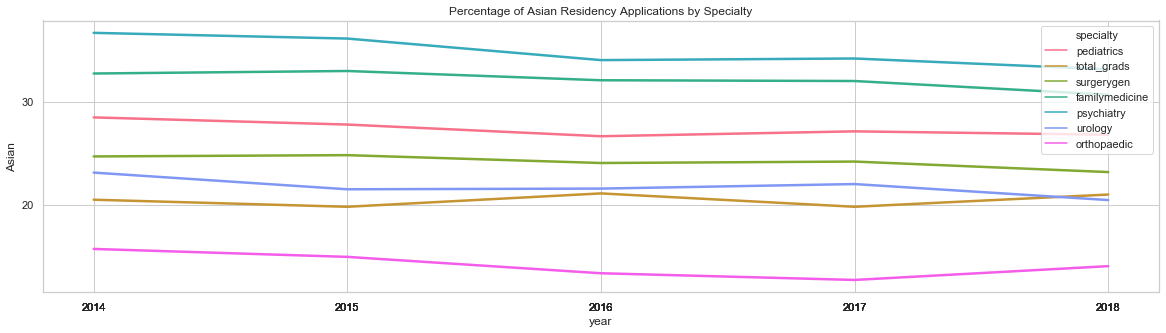

In [19]:
rcParams['figure.figsize'] = 20, 5
plt.figure()
plt.xticks(asian['year'].values)
plt.yticks(range(0,70,10))
plt.title('Percentage of Asian Residency Applications by Specialty')
sns.lineplot(data=asian,x='year',y='Asian',hue='specialty', palette="husl", linewidth=2.5)

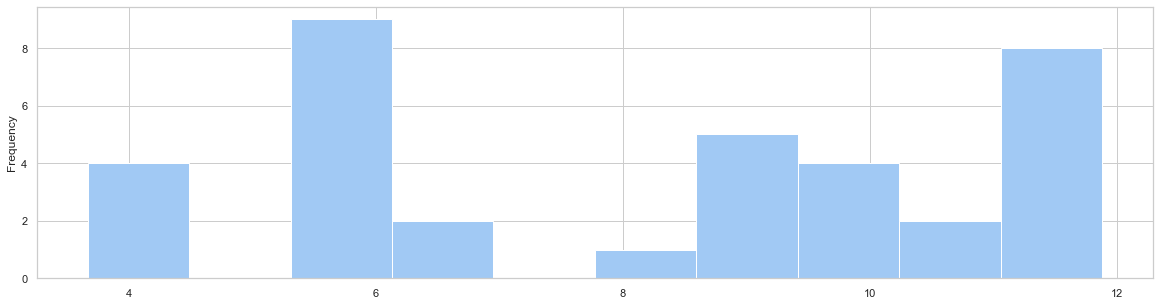

In [28]:
black['Black/African American'].plot(kind='hist')

In [29]:
list(range(0,70,10))

[0, 10, 20, 30, 40, 50, 60]

([<matplotlib.axis.YTick at 0x11ec4b080>,
 <a list of 7 Text yticklabel objects>)

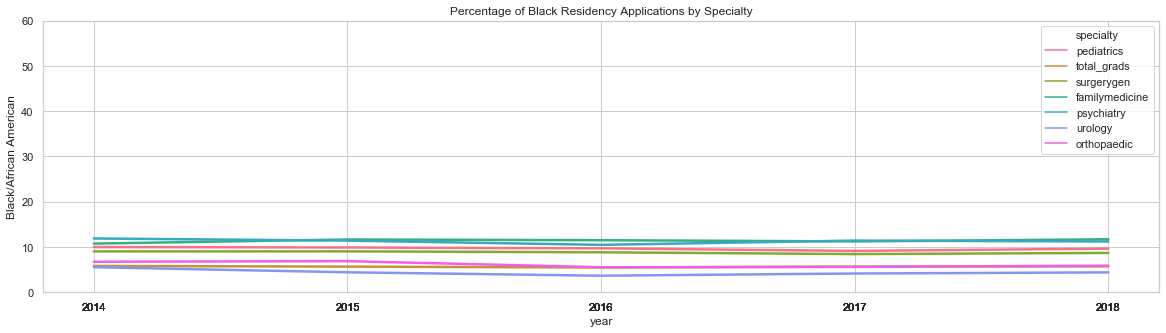

In [33]:
rcParams['figure.figsize'] = 20, 5
plt.figure()
plt.title('Percentage of Black Residency Applications by Specialty')
sns.lineplot(data=black,x='year',y='Black/African American',hue='specialty', palette="husl", linewidth=2.5)
plt.xticks(black['year'].values)
plt.yticks(range(0,70,10))

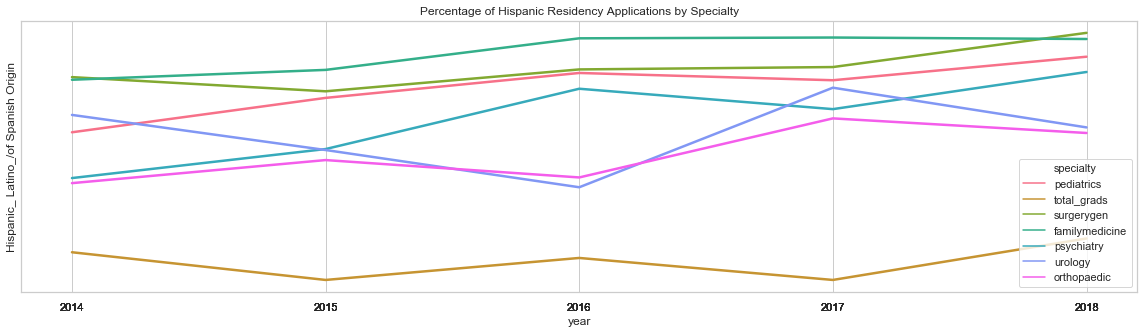

In [25]:
rcParams['figure.figsize'] = 20, 5
plt.figure()
plt.xticks(hispanic['year'].values)
plt.yticks(list(range(0,71,10)))
plt.title('Percentage of Hispanic Residency Applications by Specialty')
sns.lineplot(data=hispanic,x='year',y='Hispanic_ Latino_/of Spanish Origin',hue='specialty', palette="husl", linewidth=2.5)

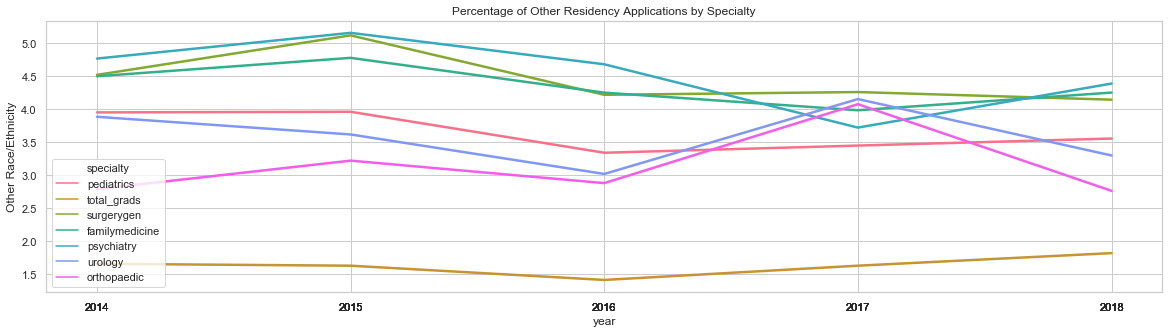

In [22]:
rcParams['figure.figsize'] = 20, 5
plt.figure()
plt.xticks(hispanic['year'].values)
plt.title('Percentage of Other Residency Applications by Specialty')
sns.lineplot(data=other,x='year',y='Other Race/Ethnicity',hue='specialty', palette="husl", linewidth=2.5)